In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.fft

In [ ]:
b = 60
w0 = 2* np.pi * 40
v0 = 0
t0 = -0.05
tn = 0.05
dt = 0.002
N = int((tn - t0) / dt)

In [ ]:
epsi = np.random.normal(0, 0.3, N)
len(epsi)

50

In [ ]:
def S(t):
  return np.exp(-(b * t)** 2) * np.cos(w0 * t + v0)

In [ ]:
ti = np.arange(t0, tn, dt)
s = np.zeros(N-1)
s0 = np.zeros(N-1)
for i in range(N-1):
  s0[i] = S(ti[i]) 
  s[i] = S(ti[i]) + epsi[i]

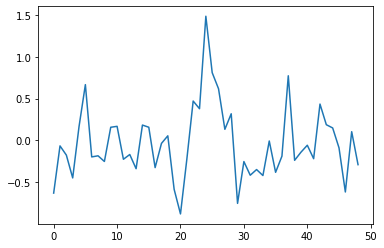

In [ ]:
plt.plot(s)

In [ ]:
k = 40
A = np.zeros((k,N-30))
B = np.zeros((k,N-30))
t0 = np.arange(-0.03, 0.03, dt)
w = np.arange(20*2*np.pi, 60*2*np.pi, 2*np.pi)
for i in range(len(w)):
  for j in range(N-30):
    A[i][j] = np.sum(s[j:30+j]*np.cos(w[i]*t0))
    B[i][j] = np.sum(s[j:30+j]*np.sin(w[i]*t0))
fi = -np.arctan(B/A)

In [ ]:
for i in range(1,len(w)):
  for j in range(fi.shape[1]):
    if (fi[i][j]-fi[i-1][j] <= -np.pi/2):
      fi[i][j] = fi[i][j] + np.pi
    else:
      if ((fi[i][j]-fi[i-1][j]) >= np.pi/2):
        fi[i][j] = fi[i][j] - np.pi
      else:
        fi[i][j] = fi[i][j] 

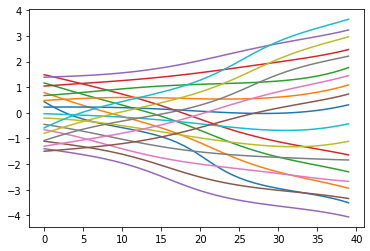

In [ ]:
plt.plot(fi)

In [ ]:
k = 40
A = np.zeros((k,N-30))
B = np.zeros((k,N-30))
t0 = np.arange(-0.03, 0.03, dt)
w = np.arange(20*2*np.pi, 60*2*np.pi, 2*np.pi)
for i in range(len(w)):
  for j in range(N-30):
    A[i][j] = np.sum(s[j:30+j]*np.cos(w[i]*t0))
    B[i][j] = np.sum(s[j:30+j]*np.sin(w[i]*t0))
fi2 = -np.arctan(B/A)

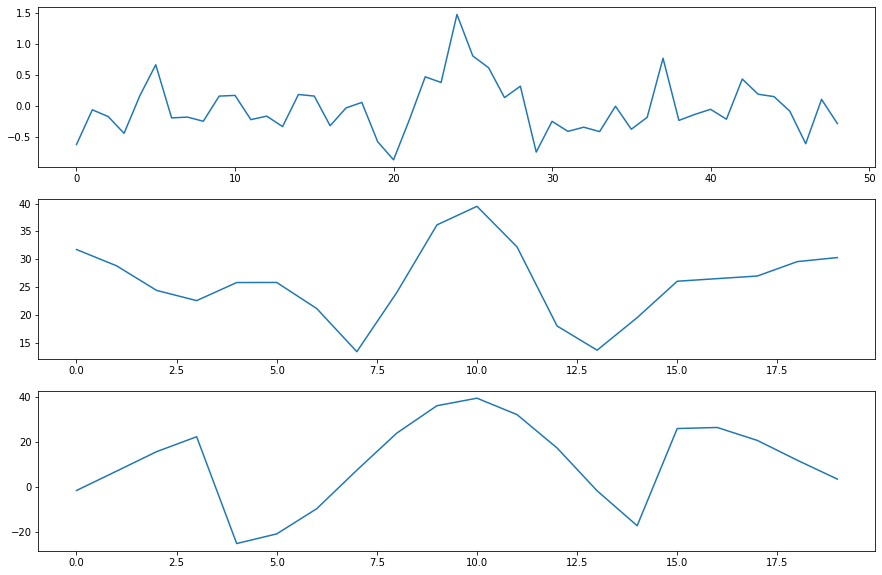

In [ ]:
# функция правдоподобия
L = np.sum(np.cos(fi), axis=0)
L2 = np.sum(np.cos(fi2), axis=0)
fig, axs = plt.subplots(nrows= 3 , ncols= 1)
axs[2].plot(L, label='доопределение')
axs[1].plot(L2, label='без определения')
axs[0].plot(s, label='чистый сигнал')
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

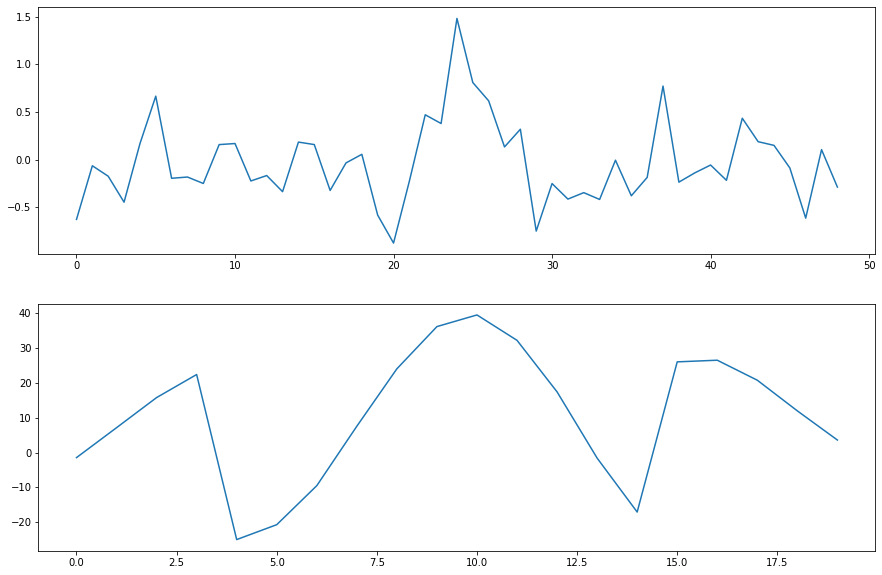

In [ ]:
L = np.sum(np.cos(fi), axis=0)
fig, axs = plt.subplots(nrows= 2 , ncols= 1)
axs[0].plot(s, label='Сигнал с шумом')
axs[1].plot(L, label='Функция правдоподобия')
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [ ]:
k = 40
A = np.zeros((k,N-30))
B = np.zeros((k,N-30))
t0 = np.arange(-0.03, 0.03, dt)
w = np.arange(20*2*np.pi, 60*2*np.pi, 2*np.pi)
for i in range(len(w)):
  for j in range(N-30):
    A[i][j] = np.sum(s0[j:30+j]*np.cos(w[i]*t0))
    B[i][j] = np.sum(s0[j:30+j]*np.sin(w[i]*t0))
fi1 = -np.arctan(B/A)

In [ ]:
for i in range(1,len(w)):
  for j in range(fi1.shape[1]):
    if (fi1[i][j]-fi1[i-1][j] <= -np.pi/2):
      fi1[i][j] = fi1[i][j] + np.pi
    else:
      if (fi1[i][j]-fi1[i-1][j] >= np.pi/2):
        fi1[i][j] = fi1[i][j] - np.pi
      else:
        fi1[i][j] = fi1[i][j] 

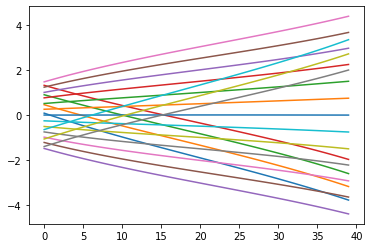

In [ ]:
plt.plot(fi1)

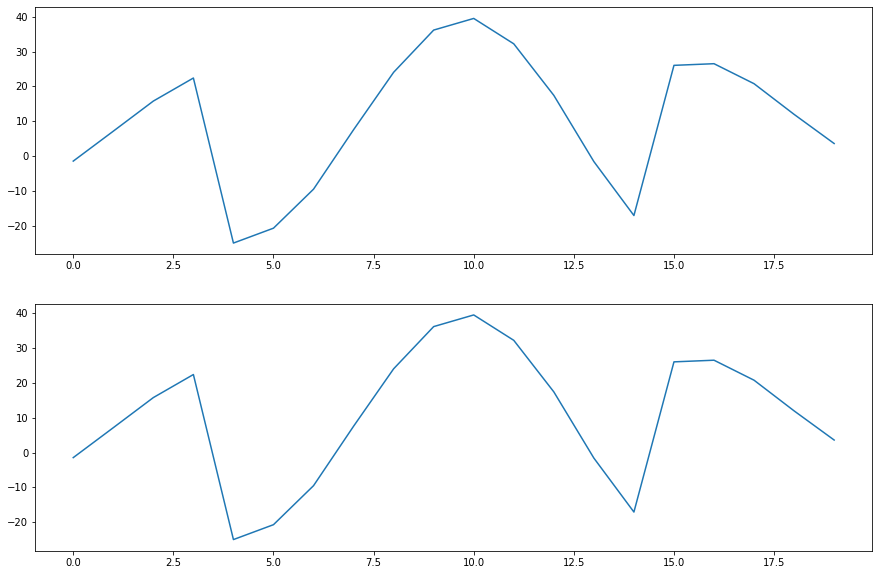

In [ ]:
# функция правдоподобия
L1 = np.sum(np.cos(fi), axis=0)
fig, axs = plt.subplots(nrows= 2 , ncols= 1)
axs[0].plot(L, label='c шумом')
axs[1].plot(L1, label='чистый сигнал')
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()